In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
AAA = eclipse_DVH('Case2_AAA.txt')
AXB = eclipse_DVH('Case2_Dm.txt')

Case2_AAA.txt loaded 	 patID = Case2_AAA	 Prescription [Gy] = 65.010
Case2_Dm.txt loaded 	 patID = Case2_AXB_Dm	 Prescription [Gy] = 65.010


In [3]:
AXB.DVH_df.columns

Index(['Rt Par edit_P1', 'SC + 3mm_P1', 'SC + 5mm_P1', 'Pseudo PTV1_P1',
       'Pseudo PTV2_P1', 'BoardTop_P', 'Pseudo Post_P1', 'R Orbit_P1',
       'L Lens_P1', 'R Lens_P1', 'PTV2miss_P', 'PTV1miss_P', 'AvoidEntry_P',
       'Dose6175[cGy]_P', 'Dose5130[cGy]_P', 'OrigBody_P', 'Pseudo Oral Cav1',
       'Pseudo Midline_1', 'PTV2 edit_P1', 'PTV2_P1', 'PTV1 edit_P1',
       'PTV1_P1', 'Lt Par edit_P1', 'Body_P1', 'BS + 5mm_P1', 'BS + 3mm_P',
       'R Parotid_P1', 'L Parotid_P1', 'Brain Stem_P1', 'Spinal Cord_P1',
       'CTV54_P1', 'CTV65_P1', 'GTVb + 10mm_P', 'GTVa + 10mm_P', 'GTV+10mm_P',
       'GTVb_P', 'GTVa_P', 'GTV_P1', 'Artefacts_P', 'L Orbit_P1',
       'Dose 5130[cGy]a_', 'Dose 6175[cGy]a_', 'Dose 5130[cGy]b_'],
      dtype='object')

(50, 75)

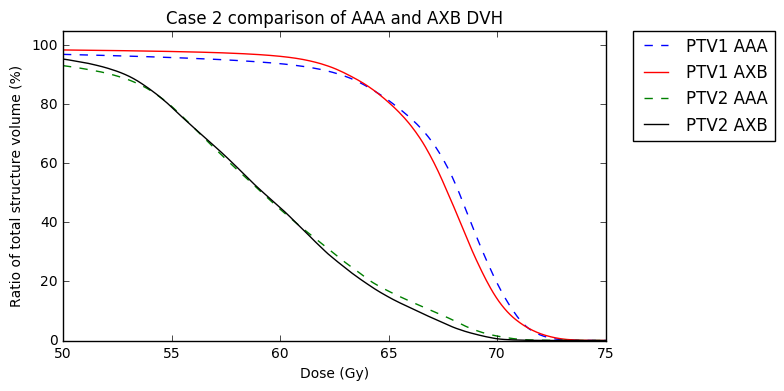

In [5]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P1'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P1'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 2 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,75])

In [6]:
Comparison_df = pd.concat([ AAA.metrics_df['PTV1_P1'], 
                            AXB.metrics_df['PTV1_P1'], 
                           
                           AAA.metrics_df['PTV2_P1'], 
                           AXB.metrics_df['PTV2_P1']], 
                           axis=1)
Comparison_df

,PTV1_P1,PTV1_P1,PTV2_P1,PTV2_P1
Metric,,,,
Structure,PTV1_P1,PTV1_P1,PTV2_P1,PTV2_P1
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case2_AAA,Case2_AXB_Dm,Case2_AAA,Case2_AXB_Dm
Course,1,1,1,1
Volume [cmÂ³],426.8,426.8,121.7,121.7
Dose Cover.[%],100.0,100.0,100.0,100.0
Sampling Cover.[%],100.0,100.0,100.0,100.0
Min Dose [%],0.1,0.0,6.1,0.8
Max Dose [%],115.8,117.2,114.2,111.9
